In [2]:
#Data Manipulation

import numpy as np
import pandas as pd

In [3]:
#Plots

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

C:\Users\ajeup\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\ajeup\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [4]:
#Modelling

from sklearn.linear_model import Ridge
from lightgbm import LGBMRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [5]:
#Forecasting

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

In [6]:
#Warnings

import warnings
warnings.filterwarnings('ignore')

In [7]:
# Data Download
url = ('D:/School Work//Machine Learning/ICA//Dataset Given/demand_01-01-2017_08-03-2022/dataset.csv')
df = pd.read_csv(url, sep = ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Time                          45432 non-null  object 
 1   Time Formatted                45432 non-null  object 
 2   Date                          45432 non-null  object 
 3   demand                        45429 non-null  float64
 4   solar_actual [MW]             45413 non-null  float64
 5   solar_forecast [MW]           45210 non-null  float64
 6   solar_inferred_capacity [MW]  45432 non-null  float64
 7   wind_actual [MW]              45413 non-null  float64
 8   wind_inferred_capacity [MW]   45432 non-null  float64
 9   albedo [%]                    45415 non-null  float64
 10  cloud_cover [%]               45416 non-null  float64
 11  frozen_precipitation [%]      45422 non-null  float64
 12  pressure [Pa]                 45421 non-null  float64
 13  r

In [8]:
data = df
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Time                          45432 non-null  object 
 1   Time Formatted                45432 non-null  object 
 2   Date                          45432 non-null  object 
 3   demand                        45432 non-null  float64
 4   solar_actual [MW]             45432 non-null  float64
 5   solar_forecast [MW]           45432 non-null  float64
 6   solar_inferred_capacity [MW]  45432 non-null  float64
 7   wind_actual [MW]              45432 non-null  float64
 8   wind_inferred_capacity [MW]   45432 non-null  float64
 9   albedo [%]                    45432 non-null  float64
 10  cloud_cover [%]               45432 non-null  float64
 11  frozen_precipitation [%]      45432 non-null  float64
 12  pressure [Pa]                 45432 non-null  float64
 13  r

In [9]:
data.isnull().sum()

Time                            0
Time Formatted                  0
Date                            0
demand                          0
solar_actual [MW]               0
solar_forecast [MW]             0
solar_inferred_capacity [MW]    0
wind_actual [MW]                0
wind_inferred_capacity [MW]     0
albedo [%]                      0
cloud_cover [%]                 0
frozen_precipitation [%]        0
pressure [Pa]                   0
radiation [W/m2]                0
air_tmp [Kelvin]                0
ground_tmp [Kelvin]             0
apparent_tmp [Kelvin]           0
wind_direction [angle]          0
wind_speed [m/s]                0
dtype: int64

In [10]:
# Data preparation
data = data.copy()
data['Time'] = pd.to_datetime(data['Time'])
data = data.set_index('Time')
data = data.asfreq('60min')
data = data.sort_index()
data.head(2)

,Time Formatted,Date,demand,solar_actual [MW],solar_forecast [MW],solar_inferred_capacity [MW],wind_actual [MW],wind_inferred_capacity [MW],albedo [%],cloud_cover [%],frozen_precipitation [%],pressure [Pa],radiation [W/m2],air_tmp [Kelvin],ground_tmp [Kelvin],apparent_tmp [Kelvin],wind_direction [angle],wind_speed [m/s]
Time,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00+01:00,1/1/2017 0:00,1/1/2017,76345.25,0.0,1278.808883,5756.44,597.5,10513.95,0.0,2.45,-3.80,102875.0,0.0,271.60,269.82,269.84,209.0,2.97
2017-01-01 01:00:00+01:00,1/1/2017 1:00,1/1/2017,75437.00,0.0,1278.808883,5756.44,597.5,10513.95,0.0,2.48,-3.46,102839.0,0.0,271.62,269.85,269.79,212.0,3.13


In [11]:
# Verify that a temporary index is complete

(data.index == pd.date_range(start=data.index.min(),
                              end=data.index.max(),
                              freq=data.index.freq)).all()

True

In [12]:
print(f"Number of rows with missing values: {data.isnull().any(axis=1).mean()}")

Number of rows with missing values: 0.0


In [13]:
#Split dataset into train-validation-testing

data = data.loc['2017-01-01 00:00:00' : '2022-03-08 23:00:00']
end_train = '2020-12-31 23:59:00'
end_validation = '2022-01-07 23:59:00'
data_train = data.loc[: end_train, :]
data_validation = data.loc[end_train:end_validation, :]
data_test = data.loc[end_validation:,:]
print(f"Train dates      :  {data_train.index.min()} ------- {data_train.index.max()}")
print(f"Validation dates :  {data_validation.index.min()} ------- {data_validation.index.max()}")
print(f"Test dates       :  {data_test.index.min()} ------- {data_test.index.max()}")

Train dates      :  2017-01-01 00:00:00+01:00 ------- 2020-12-31 23:00:00+01:00
Validation dates :  2021-01-01 00:00:00+01:00 ------- 2022-01-07 23:00:00+01:00
Test dates       :  2022-01-08 00:00:00+01:00 ------- 2022-03-08 23:00:00+01:00


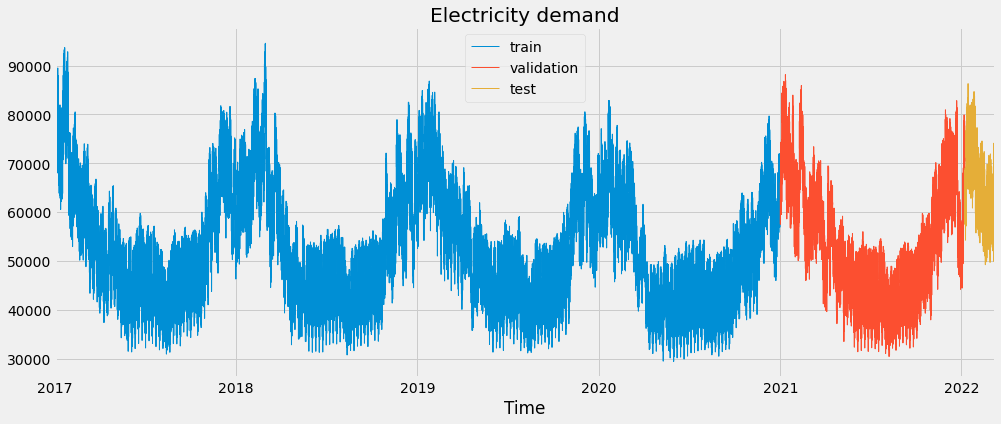

In [14]:
# Time series plot

fig, ax = plt.subplots(figsize=(15, 6))
data_train.demand.plot(ax=ax, label='train', linewidth=1)
data_validation.demand.plot(ax=ax, label='validation', linewidth=1)
data_test.demand.plot(ax=ax, label='test', linewidth=1)
ax.set_title('Electricity demand')
ax.legend();

In [ ]:
sns.pairplot(data)


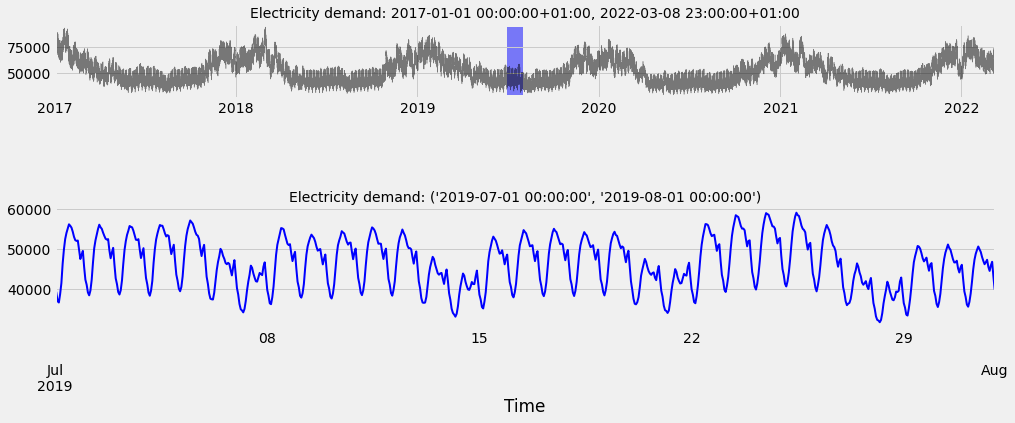

In [15]:
# Zooming time series chart

zoom = ('2019-07-01 00:00:00','2019-08-01 00:00:00')
fig = plt.figure(figsize = (15,6))
grid = plt.GridSpec(nrows = 8, ncols = 1, hspace = 0.6, wspace = 0)

main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:,:])

data.demand.plot(ax=main_ax, c = 'black', alpha = 0.5, linewidth = 0.5)
min_y = min(data.demand)
max_y = max(data.demand)

main_ax.fill_between(zoom, min_y, max_y, facecolor = 'blue', alpha = 0.5, zorder = 0)
main_ax.set_xlabel('')

data.loc[zoom[0]: zoom[1]].demand.plot(ax=zoom_ax, color='blue', linewidth=2)

main_ax.set_title(f'Electricity demand: {data.index.min()}, {data.index.max()}', fontsize=14)
zoom_ax.set_title(f'Electricity demand: {zoom}', fontsize=14)
plt.subplots_adjust(hspace=1)


Text(0.5, 0.98, '')

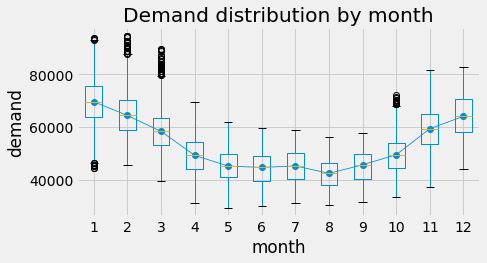

In [16]:
# Boxplot for annual seasonality

fig, ax = plt.subplots(figsize = (7,3.5))
data['month'] = data.index.month
data.boxplot(column = 'demand', by = 'month', ax=ax)
data.groupby('month')['demand'].median().plot(style ='o-', linewidth = 0.8, ax=ax)
ax.set_ylabel('demand')
ax.set_title('Demand distribution by month')
fig.suptitle('')

Text(0.5, 0.98, '')

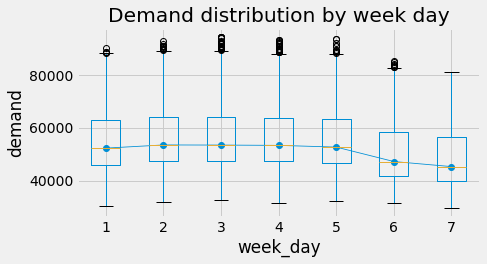

In [17]:
# Boxplot for electricity demand seen in a week

fig, ax = plt.subplots(figsize = (7,3.5))
data['week_day'] = data.index.day_of_week + 1
data.boxplot(column = 'demand', by = 'week_day', ax = ax)
data.groupby('week_day')['demand'].median().plot(style = 'o-', linewidth = 0.8, ax = ax)
ax.set_ylabel('demand')
ax.set_title('Demand distribution by week day')
fig.suptitle('')

Text(0.5, 0.98, '')

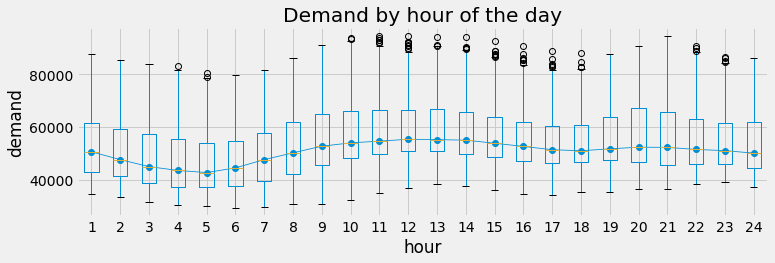

In [18]:
fig, ax = plt.subplots(figsize = (12,3.5))
data['hour'] = data.index.hour + 1
data.boxplot(column = 'demand', by = 'hour', ax=ax)
data.groupby('hour')['demand'].median().plot(style = 'o-', linewidth = 0.8, ax =ax)
ax.set_ylabel('demand')
ax.set_title('Demand by hour of the day')
fig.suptitle('')

In [19]:
# Create and train forecaster 

forecaster = ForecasterAutoreg(
                regressor = make_pipeline(StandardScaler(), Ridge()),
                lags      = 24
             )

forecaster.fit(y=data.loc[:end_validation, 'demand'])
forecaster

ForecasterAutoreg 
Regressor: Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())]) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24] 
Window size: 24 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [Timestamp('2017-01-01 00:00:00+0100', tz='tzoffset(None, 3600)'), Timestamp('2022-01-07 23:00:00+0100', tz='tzoffset(None, 3600)')] 
Training index type: DatetimeIndex 
Training index frequency: 60T 
Regressor parameters: {'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'ridge__alpha': 1.0, 'ridge__copy_X': True, 'ridge__fit_intercept': True, 'ridge__max_iter': None, 'ridge__normalize': 'deprecated', 'ridge__positive': False, 'ridge__random_state': None, 'ridge__solver': 'auto', 'ridge__tol': 0.001} 
Creation date: 2022-04-26 00:19:23 
Last fit date: 2022-04-26 00:19:23 
Skforecast version: 0.4.3 

In [20]:
metric, predictions = backtesting_forecaster(
                            forecaster = forecaster,
                            y          = data.demand,
                            initial_train_size = len(data.loc[:end_validation]),
                            fixed_train_size   = False,
                            steps      = 24,
                            metric     = 'mean_absolute_error',
                            refit      = False,
                            verbose    = True
                       )

Information of backtesting process
----------------------------------
Number of observations used for initial training or as initial window: 43992
Number of observations used for backtesting: 1440
    Number of folds: 60
    Number of steps per fold: 24

Data partition in fold: 0
    Training:   2017-01-01 00:00:00+01:00 -- 2022-01-07 23:00:00+01:00
    Validation: 2022-01-08 00:00:00+01:00 -- 2022-01-08 23:00:00+01:00
Data partition in fold: 1
    Training:   2017-01-01 00:00:00+01:00 -- 2022-01-07 23:00:00+01:00
    Validation: 2022-01-09 00:00:00+01:00 -- 2022-01-09 23:00:00+01:00
Data partition in fold: 2
    Training:   2017-01-01 00:00:00+01:00 -- 2022-01-07 23:00:00+01:00
    Validation: 2022-01-10 00:00:00+01:00 -- 2022-01-10 23:00:00+01:00
Data partition in fold: 3
    Training:   2017-01-01 00:00:00+01:00 -- 2022-01-07 23:00:00+01:00
    Validation: 2022-01-11 00:00:00+01:00 -- 2022-01-11 23:00:00+01:00
Data partition in fold: 4
    Training:   2017-01-01 00:00:00+01:00 -- 20

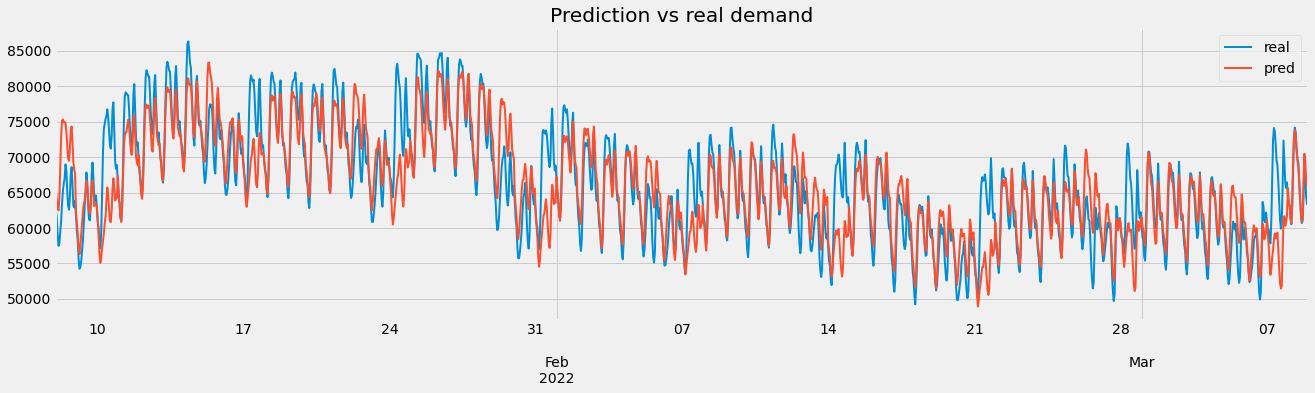

In [21]:
# Plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(20, 5))
data.loc[predictions.index, 'demand'].plot(ax=ax, linewidth=2, label='real')
predictions.plot(linewidth=2, label='prediction', ax=ax)
ax.set_title('Prediction vs real demand')
ax.legend();

In [22]:
# Backtest error
# ==============================================================================
print(f'Backtest error: {metric}')

Backtest error: 2877.8271479912787
